In [21]:
import requests
import pandas as pd
import time
import pickle
import numpy as np
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [22]:
df_result=pd.read_csv('britney_50sent_lyrics.csv')

In [23]:
df_result.drop(['Unnamed: 0'],axis=1, inplace=True)

In [24]:
df_result

,lyrics text,Artist
0,"Oh baby, baby",Britney spears
1,"Oh baby, baby",Britney spears
2,"Oh baby, baby, how was I supposed to know",Britney spears
3,That something wasn't right here,Britney spears
4,"Oh baby, baby, I shouldn't have let you go",Britney spears
...,...,...
42951,Y'all don't do it how we do,50 Cent
42952,Niggas ain't on the shit we on,50 Cent
42953,Everything new,50 Cent
42954,Spikes on the Louis Vuittons,50 Cent


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')



In [26]:
X=df_result['lyrics text']
y= df_result['Artist']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=10)

In [28]:
X_train = vectorizer.fit_transform(X_train.values.astype('U'))

I added value.astype('U') because i had an error that:ValueError , np.nan is an invalid document. so i Turn objects into unicodes

In [29]:
X_train_df = pd.DataFrame(X_train.todense(), columns=vectorizer.get_feature_names())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
X_train_df

,00,007,03,06,092,10,100,1000,1000000x,101,...,ziplocs,zipper,zippers,zombies,zone,zonin,zoo,zooming,zy,ït
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34360,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=40, n_estimators=100, random_state=10)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=40, random_state=10)

In [32]:
rf.score(X_train, y_train)  

0.8926492841345595

In [33]:
X_test=vectorizer.transform(X_test.values.astype('U'))

In [34]:
X_test

<8592x9589 sparse matrix of type '<class 'numpy.float64'>'
	with 51353 stored elements in Compressed Sparse Row format>

In [35]:
X_test_df = pd.DataFrame(X_test.todense(), columns=vectorizer.get_feature_names())
X_test_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,007,03,06,092,10,100,1000,1000000x,101,...,ziplocs,zipper,zippers,zombies,zone,zonin,zoo,zooming,zy,ït
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
rf.score(X_test, y_test) 

0.8461359404096834

In [37]:
def print_evaluations(y, ypred, model_name):
    print(f'Scores of the model {model_name}:')
    print(f'The accuracy of the model is: {round(accuracy_score(y, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(y, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(y, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(y, ypred), 3)}')
    
    #print confusion matrix
    #cm = confusion_matrix(y, ypred)    
    #disp = ConfusionMatrixDisplay(cm)
    #disp.plot()

In [38]:
ypred = rf.predict(X_test)

In [39]:
ypred

array(['Britney spears', 'Britney spears', '50 Cent', ..., '50 Cent',
       'Britney spears', '50 Cent'], dtype=object)

In [40]:
y

0        Britney spears
1        Britney spears
2        Britney spears
3        Britney spears
4        Britney spears
              ...      
42951           50 Cent
42952           50 Cent
42953           50 Cent
42954           50 Cent
42955           50 Cent
Name: Artist, Length: 42956, dtype: object

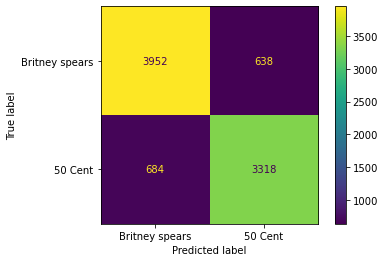

In [41]:

cm = confusion_matrix(y_test, ypred)    
disp = ConfusionMatrixDisplay(cm, display_labels=['Britney spears', '50 Cent'])
disp.plot()

In [42]:
filename = 'finalized_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [43]:
filename = 'finalized_vectorizer.sav'
pickle.dump(vectorizer, open(filename, 'wb'))